In [1]:
import numpy as np
from benchmark.ode.integrate import generate_ode_data


def van_der_pol(mu=1.0, alpha=0.0):
    def dy(state, t):
        x, y = state
        dx = y - alpha * y**2
        dy = mu* ( 1 - x**2)* y - x + alpha * x**2
        return dx, dy
    return dy



x0 = [1.0, 0]

N = 10000
t = np.linspace(0, 100, N, endpoint=False)

x, dx = generate_ode_data(van_der_pol, x0, t, {"mu": 5})

t2 = np.linspace(t[-1], 2*t[-1], N, endpoint=False)
x2, dx2 = generate_ode_data(van_der_pol, x[-1], t2, {"mu": 7.5, "alpha": -0.25})

t3 = np.linspace(t2[-1], 3*t[-1], N, endpoint=False)
x3, dx3 = generate_ode_data(van_der_pol, x2[-1], t2, {"mu": 6.0, "alpha": 0.0})

x_vdp = np.vstack([x, x2, x3])
dx_vdp = np.vstack([dx, dx2, dx3])
t_vdp = np.hstack([t, t2, t3])

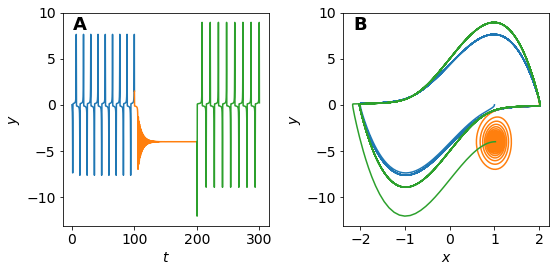

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import string

%matplotlib inline

with mpl.rc_context(rc={'font.size': 14}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2.))

    ax1.plot(t, x[:, 1])
    ax1.plot(t2, x2[:, 1])
    ax1.plot(t3, x3[:, 1])
    ax1.set_xlabel(r"$t$")
    ax1.set_ylabel(r"$y$")
    
    ax2.plot(x[:, 0], x[:, 1])
    ax2.plot(x2[:, 0], x2[:, 1])
    ax2.plot(x3[:, 0], x3[:, 1])
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$y$")
                                   
                                   
    for i, ax in enumerate([ax1, ax2]):
        ax.text(0.05, 0.92, s=string.ascii_uppercase[i], transform=ax.transAxes, weight="bold", fontsize=18)
    
    plt.tight_layout()
    #plt.savefig("../figures/vanderpol/traj_phase.pdf")

In [4]:
from adaptive_sindy import analysis, lyap_plot, make_table
from grid import grid

t_model = 20
t_update = 10
t_error = 1.0
error_threshold = 1.5
model_history, stats = analysis(grid, x_vdp, dx_vdp, t_vdp, t_model,
                                t_update, t_error, error_threshold)


#make_table("../tables/vanderpol.tex", model_history, varnames="xy")


    initial model
dx_0/dt =  1.0*x1
dx_1/dt =  -1.0*x0+4.989*x1+-4.989*x0^2 x1

   remodeling at  106.3900000000002 

dx_0/dt =  0.995*x1+0.249*x1^2
dx_1/dt =  -1.257*x0+7.457*x1+-7.459*x0^2 x1


/Users/mq/.miniconda/envs/adaptive-sindy-oss/lib/python3.7/site-packages/sparsereg/model/base.py:114: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coeficients
  warnings.warn("Sparsity parameter is too big ({}) and eliminated all coeficients".format(self.threshold))



   remodeling at  200.1199999999999 

dx_0/dt =  0.999*x1
dx_1/dt =  -1.0*x0+5.975*x1+-5.976*x0^2 x1


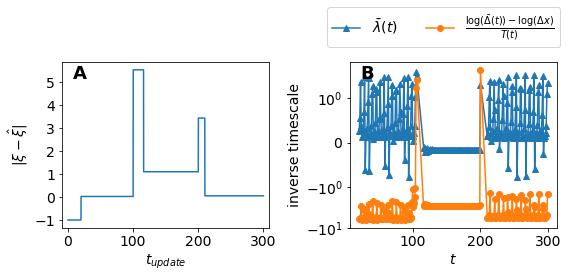

In [5]:
from adaptive_sindy import make_targets, plot_error


def targets1():
    vdp_x = {"x1": 1,}
    vdp_y = {"x1": 5, "x0^2x1": -5, "x0": -1}
    return make_targets(grid, [vdp_x, vdp_y])


def targets2():
    vdp_x = {"x1": 1, "x1^2": -0.25}
    vdp_y = {"x0^2": 0.25 ,"x1": 7.5, "x0^2x1": -7.5, "x0": -1}
    return make_targets(grid, [vdp_x, vdp_y])


def targets3():
    vdp_x = {"x1": 1, "x1^2": 0}
    vdp_y = {"x0^2": 0 ,"x1": 6, "x0^2x1": -6, "x0": -1}
    return make_targets(grid, [vdp_x, vdp_y])


def get_targets(t):
    if t < 100:
        return targets1()
    elif t < 200:
        return targets2()
    else:
        return targets3()



from adaptive_sindy import lyap_plot, plot_error


with mpl.rc_context(rc={'font.size': 14}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2.))
    lyap_plot(ax2, *stats)
    plot_error(ax1, model_history, t_vdp, get_targets)
    for i, ax in enumerate([ax1, ax2]):
        ax.text(0.05, 0.9, s=string.ascii_uppercase[i], transform=ax.transAxes, weight="bold", fontsize=18)
lgd = ax2.get_legend()
plt.tight_layout()
#plt.savefig("../figures/vanderpol/error_horizon.pdf", bbox_extra_artists=(lgd,), bbox_inches="tight")